<a href="https://colab.research.google.com/github/Rajakumaran-S/Seoul_Bike_Sharing_Demand_Prediction-_Capstone_Project-II/blob/main/Raja_Bike_Sharing_Demand_Prediction_Capstone_Project_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of the day
* ### Temperature-Temperature in Celsius
* ### Humidity - Humidity measures %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

## <b><u>Importing Necessory Library and Reading Dataset

In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mounting  google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading dataset

df = pd.read_csv('/content/drive/MyDrive/Alma Better/SeoulBikeData.csv',encoding= 'unicode_escape',parse_dates=['Date'])

## <b><u>Overview of data

In [4]:
# head of sample data:

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
# Information of dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

### <b>Observation:
* There are 14 Columns and 8760 Rows in the Dataset.
* 9 No of Numerical Variables, 1 column Datetime and 4 No of Categorical variables are there
* There No Null Values in the Dataset.

In [6]:
# description of data:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [7]:
# Columns:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [8]:
#print the unique value
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

## <b><u> Features description

**Breakdown of Our Features:**

**Date** : *The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : datetime*

**Rented Bike Count** : *Number of rented bikes per hour which our dependent variable and we need to predict that, type : int*

**Hour**: *The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.*

**Temperature(°C)**: *Temperature in Celsius, type : Float*

**Humidity(%)**: *Humidity in the air in %, type : int*

**Wind speed (m/s)** : *Speed of the wind in m/s, type : Float*

**Visibility (10m)**: *Visibility in m, type : int*

**Dew point temperature(°C)**: *Temperature at the beggining of the day, type : Float*

**Solar Radiation (MJ/m2)**: *Sun contribution, type : Float*

**Rainfall(mm)**: *Amount of raining in mm, type : Float*

**Snowfall (cm)**: *Amount of snowing in cm, type : Float*

**Seasons**: *Season of the year, type : str, there are only 4 season's in data*. 

**Holiday**: *If the day  is holiday period or not, type: str*

**Functioning Day**: *If the day is a Functioning Day or not, type : str*






## <b><u>Preprocessing the data:

In [9]:
#Missing values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [10]:
# Checking duplicate values in dataset
df.duplicated().sum()

0

In [11]:
# split day of week, month and year in three column
df['day_of_week'] = df['Date'].dt.day_name() # extract week name from Date column
df["month"] = df['Date'].dt.month_name()   # extract month name from Date column
df["year"] = df['Date'].map(lambda x: x.year).astype('object')    # extract year from Date column and convert to onject type

In [12]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
df['weekdays_weekend']=df['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df=df.drop(columns=['Date','year'],axis=1)
# ,'day_of_week'

In [13]:
df['weekdays_weekend']=df['weekdays_weekend'].astype('object')
# convert Hour,month, column integer to Categorical 
df['Hour']=df['Hour'].astype('object')
df['month']=df['month'].astype('object')
df['weekdays_weekend']=df['weekdays_weekend'].astype('object')

In [14]:
# Finally Check Info of data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   object 
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  day_of_week                8760 non-null   objec

### <b>Observation:
* In the above data after count the missing and duplicate value we came to know that there are no missing and duplicate value present.
* So we convert the "date" column into 3 different column i.e "year","month","day".***
* The "year" column in our data set is basically contain the 2 unique number contains the details of from 2017 december to 2018 november so if i consider this is a one year then we don't need the "year" column so we drop it.
* The other column "day", it contains the details about the each day of the month, for our relevence we don't need each day of each month data but we need the data about, if a day is a weekday or a weekend so we convert it into this format and drop the "day" column.


## <b><u>Performing Some EDA:

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays and weekend ')]

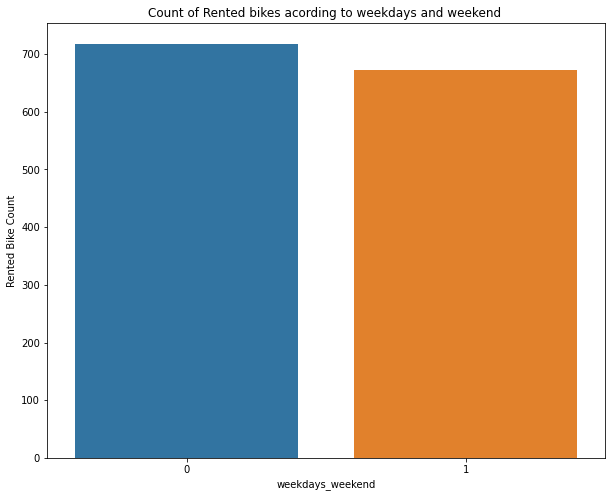

In [15]:
#anlysis of Count of Rented bikes acording to weekdays and weekend by vizualisation
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='weekdays_weekend',y='Rented Bike Count',ax=ax,ci = 0)
ax.set(title='Count of Rented bikes acording to weekdays and weekend ')

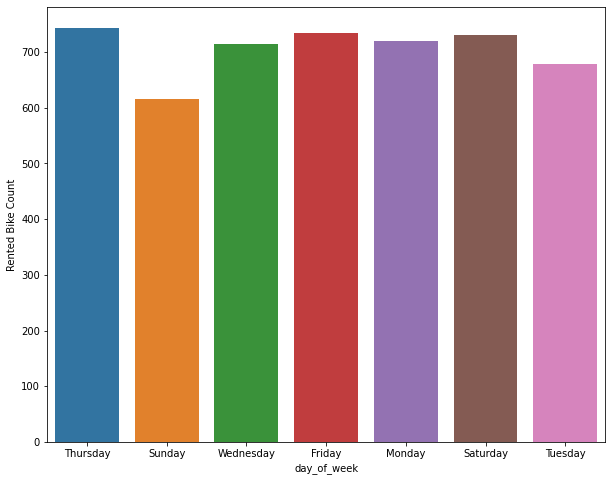

In [16]:
#anlysis of Count of Rented bikes acording to Each Day of Week and weekend by vizualisation
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='day_of_week',y='Rented Bike Count',ax=ax,ci = 0)

In [17]:
df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day_of_week,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,November,0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,November,0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,November,0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,November,0


In [18]:
#Count of Rented bikes acording to weekdays_weekend
data=df.groupby(df['weekdays_weekend'])['Rented Bike Count'].sum().reset_index()['Rented Bike Count']
data

0    4462544
1    1709770
Name: Rented Bike Count, dtype: int64

Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend')

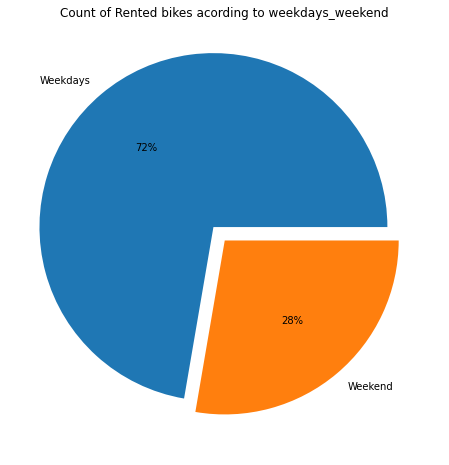

In [19]:
#anlysis of Count of Rented bikes acording to weekdays_weekend by vizualisation
fig, ax = plt.subplots(figsize =(8, 8))
plt.pie(data,autopct='%1.0f%%',labels =['Weekdays','Weekend'],explode=(0.1,0.0009))
ax.set_title('Count of Rented bikes acording to weekdays_weekend')


[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday')]

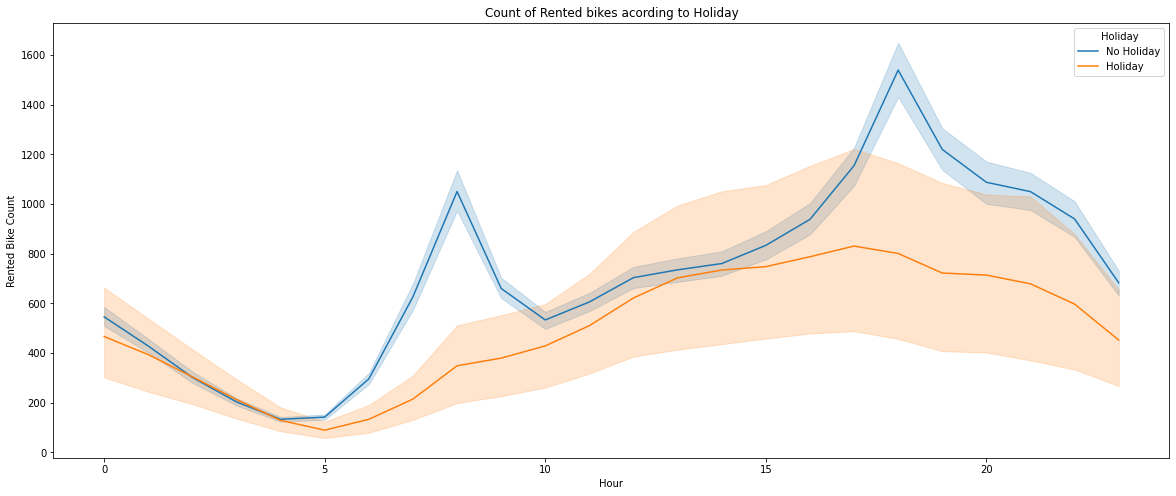

In [20]:
#anlysis of Count of Rented bikes acording to Holiday by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.lineplot(data=df,x='Hour',y='Rented Bike Count',hue='Holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday')

In [21]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'day_of_week', 'month',
       'weekdays_weekend'],
      dtype='object')

Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays')

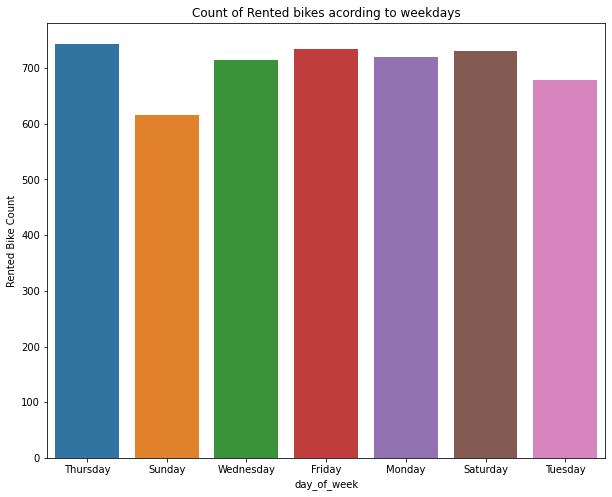

In [22]:
#anlysis of Count of Rented bikes acording to weekdays by vizualisation
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='day_of_week',y='Rented Bike Count',ax=ax,ci = 0)
ax.set_title('Count of Rented bikes acording to weekdays')

Text(0.5, 1.0, 'Temprature Disribution')

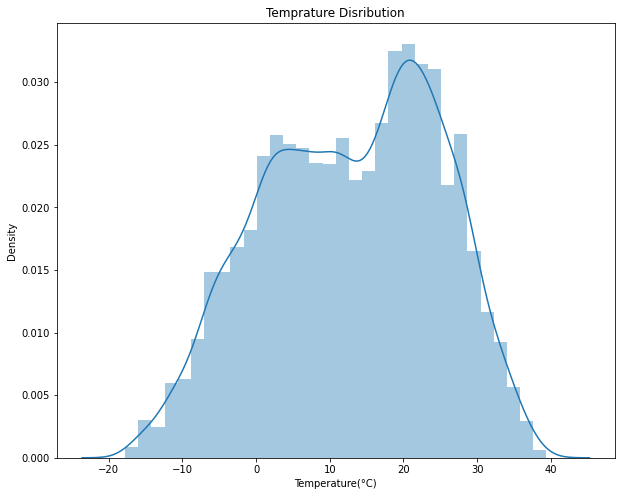

In [23]:
# Visualization of Temprature Disribution
fig,ax=plt.subplots(figsize=(10,8))
sns.distplot(df['Temperature(°C)'],ax=ax)
ax.set_title('Temprature Disribution')

Text(0.5, 1.0, 'Count of Rented bikes acording to Temprature range')

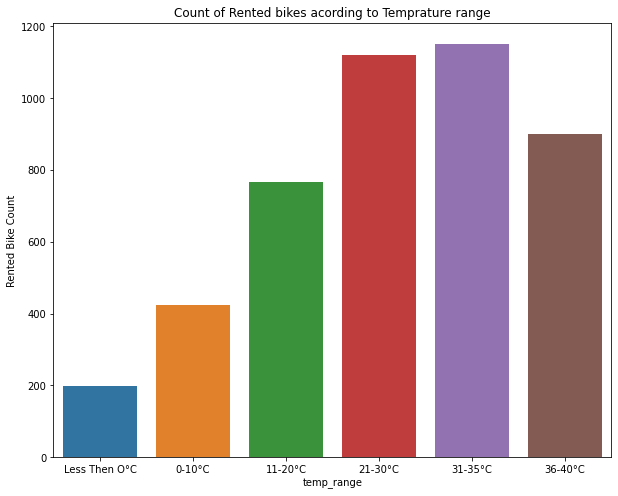

In [24]:
#anlysis of Count of Rented bikes acording to Temprature range by vizualisation
df['temp_range']=df['Temperature(°C)'].map(lambda x: 'Less Then O°C' if x<0 else '0-10°C' if 0<=x<=10 else '11-20°C' if 10<x<=20 else '21-30°C' if 20<x<=30 else '31-35°C' if 30<x<=35 else '36-40°C' if 35<x<40 else 'More then 40°C')
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='temp_range',y='Rented Bike Count',ax=ax,ci = 0)
ax.set_title('Count of Rented bikes acording to Temprature range')

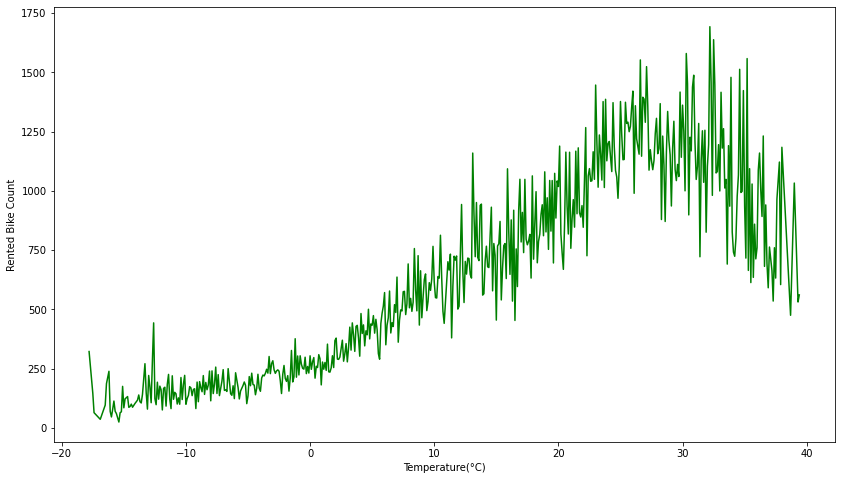

In [25]:
fig=plt.figure(figsize=(14,8))
ax=plt.gca()
sns.lineplot(data=df.groupby('Temperature(°C)').mean()['Rented Bike Count'],ax=ax,color='g')


[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

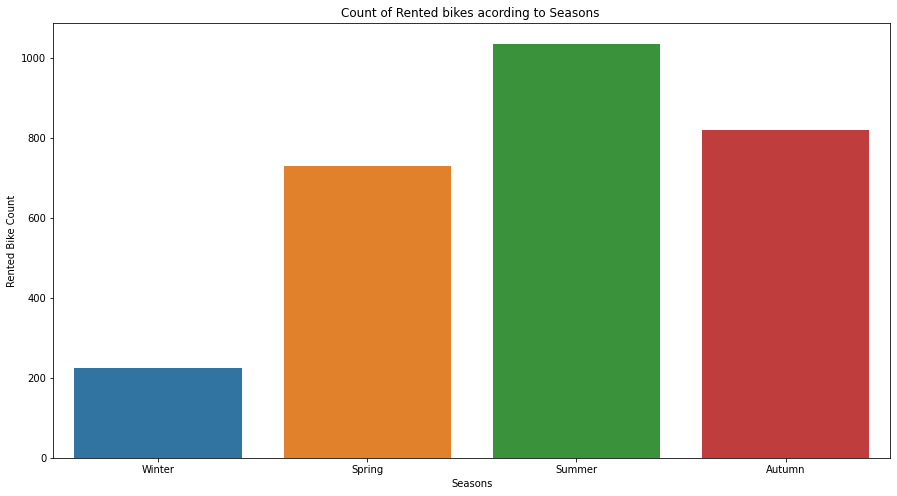

In [26]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=df,x='Seasons',y='Rented Bike Count',ax=ax,ci=0)
ax.set(title='Count of Rented bikes acording to Seasons ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month ')]

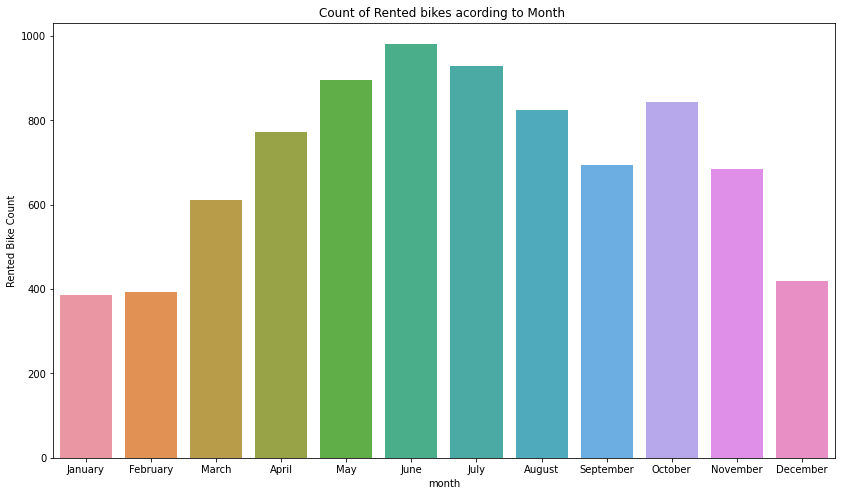

In [27]:
#anlysis of data by vizualisation
fig=plt.figure(figsize=(14,8))
ax=plt.gca()
sns.barplot(data=df,x='month',y='Rented Bike Count',ax=ax,ci = 0)
ax.set(title='Count of Rented bikes acording to Month ')

## <b>Analyze of Numerical variables

In [28]:
# Numerical Columns
num_col=set(df.describe().columns.to_list())-{'Rented Bike Count'}
print(num_col)

{'Rainfall(mm)', 'Wind speed (m/s)', 'Snowfall (cm)', 'Visibility (10m)', 'Humidity(%)', 'Dew point temperature(°C)', 'Temperature(°C)', 'Solar Radiation (MJ/m2)'}


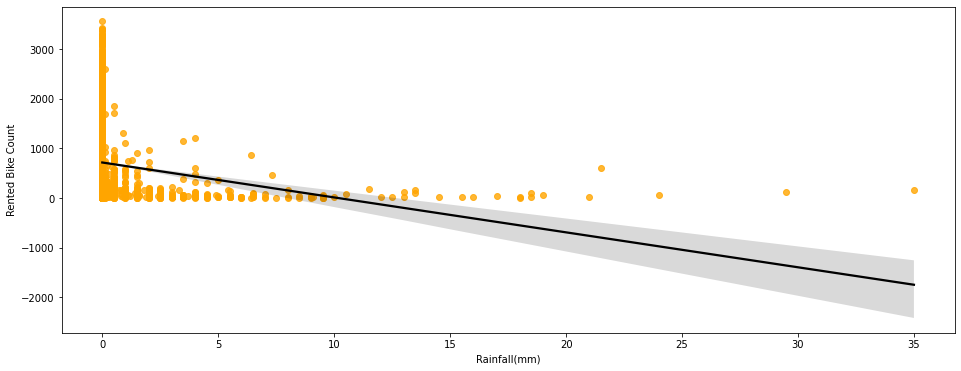

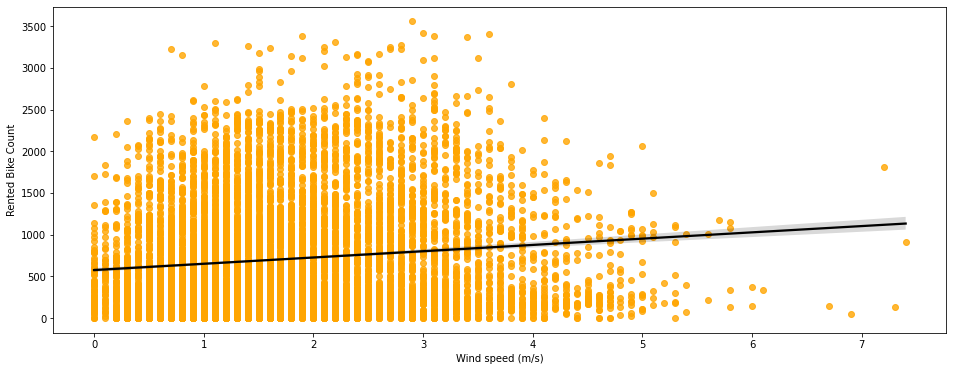

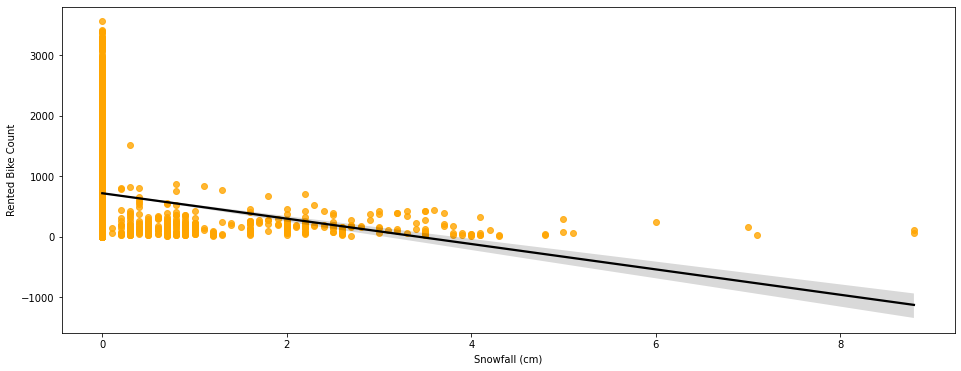

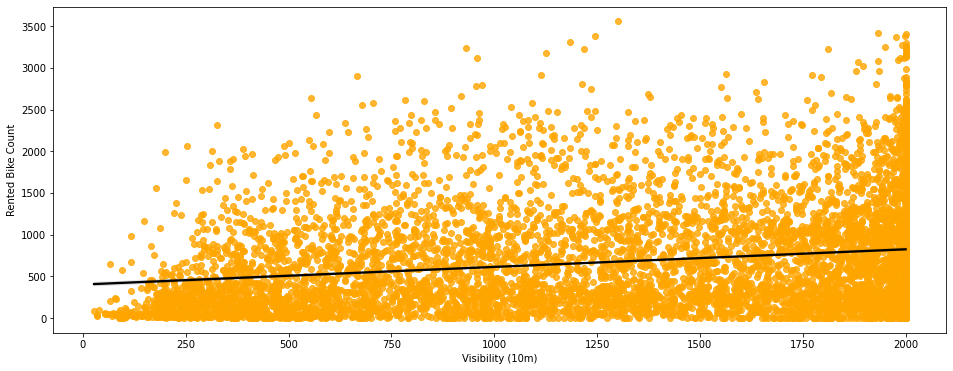

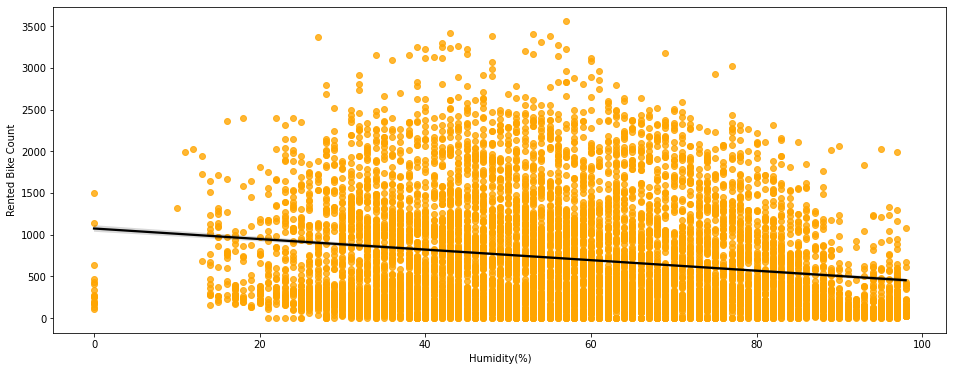

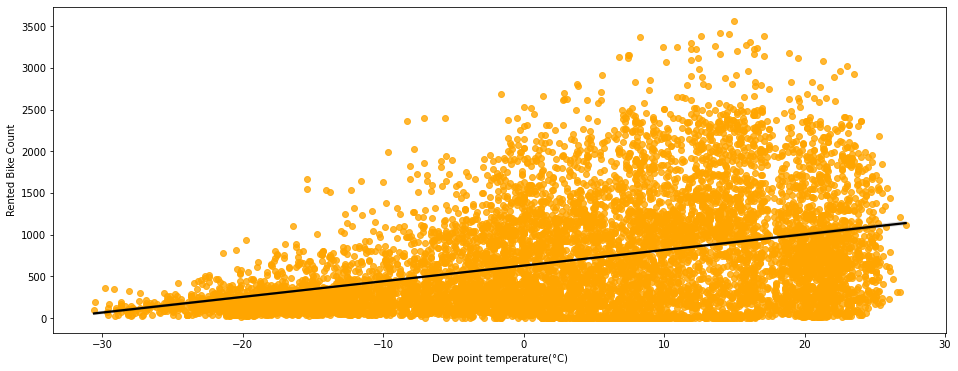

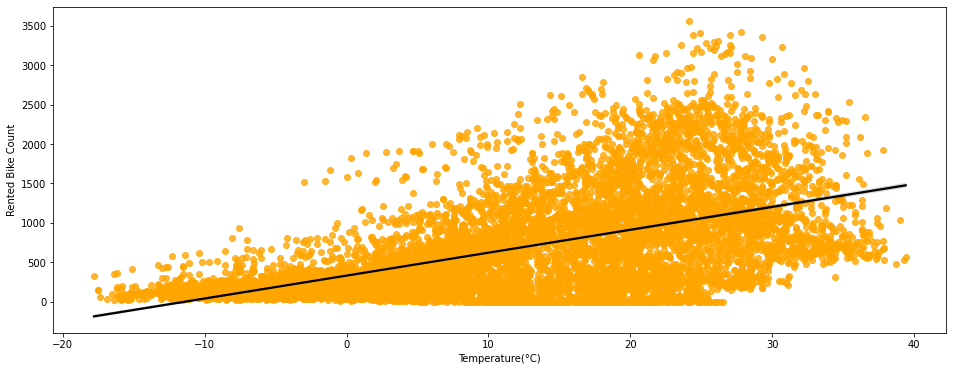

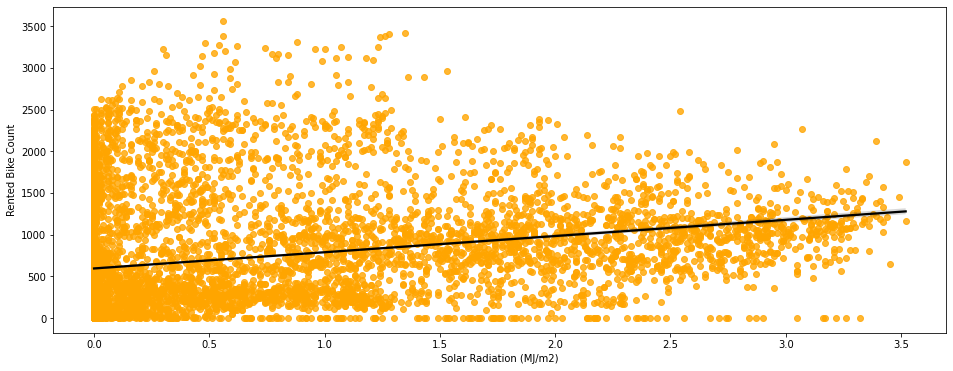

In [29]:
#printing the regression plot for all the numerical features
for col in num_col:
  fig,ax=plt.subplots(figsize=(16,6))
  sns.regplot(x=df[col],y=df['Rented Bike Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

## <b>Normalise Rented_Bike_Count column data

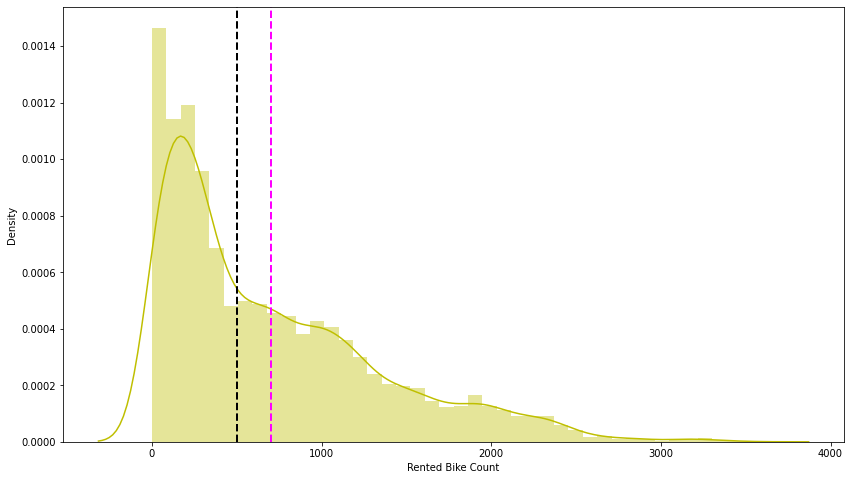

In [30]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(14,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')
ax=sns.distplot(df['Rented Bike Count'],hist=True ,color="y")
ax.axvline(df['Rented Bike Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(df['Rented Bike Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

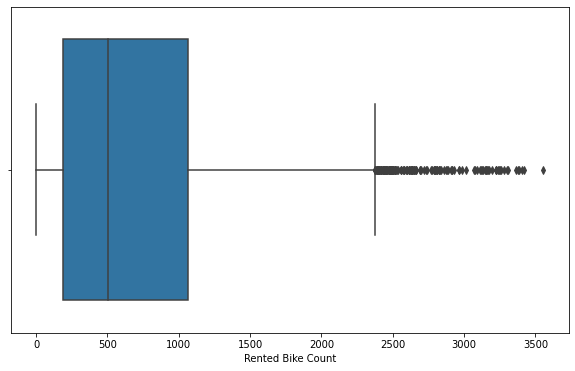

In [31]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Rented Bike Count'])
plt.show()

Text(0.5, 1.0, 'Square root')

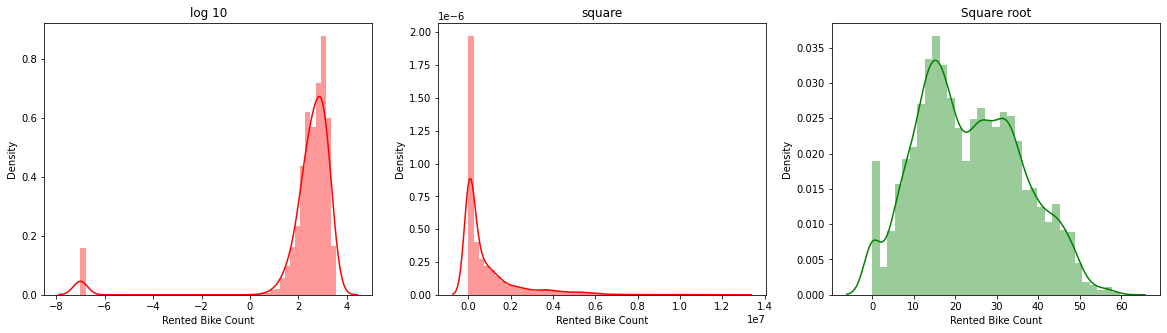

In [32]:
fig,axes = plt.subplots(1,3,figsize=(20,5))
sns.distplot(np.log10(df['Rented Bike Count']+0.0000001),ax=axes[0],color='red').set_title("log 10")
sns.distplot((df['Rented Bike Count']**2),ax=axes[1],color='red').set_title("square")
sns.distplot(np.sqrt(df['Rented Bike Count']),ax=axes[2], color='green').set_title("Square root")

##**Checking of Correlation between variables**


In [33]:
# Correlation with Rented Bike Count
df.corr()['Rented Bike Count']

Rented Bike Count            1.000000
Temperature(°C)              0.538558
Humidity(%)                 -0.199780
Wind speed (m/s)             0.121108
Visibility (10m)             0.199280
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
Name: Rented Bike Count, dtype: float64

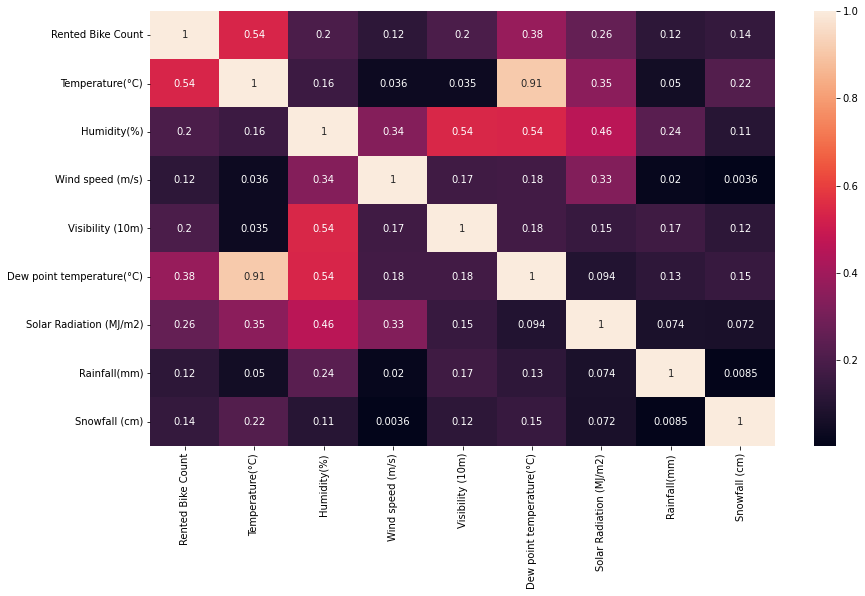

In [34]:
# using seaborn heatmap for ploting correlation graph 
fig=plt.figure(figsize=(14,8))
ax=plt.gca()
sns.heatmap(abs(df.corr()),ax=ax,annot=True)

## <b>Checking Multicollinearity

In [35]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [36]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])

,variables,VIF
0,Temperature(°C),3.166007
1,Humidity(%),4.758651
2,Wind speed (m/s),4.079926
3,Visibility (10m),4.409448
4,Solar Radiation (MJ/m2),2.246238
5,Rainfall(mm),1.078501
6,Snowfall (cm),1.118901


In [37]:
num_col

{'Dew point temperature(°C)',
 'Humidity(%)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Solar Radiation (MJ/m2)',
 'Temperature(°C)',
 'Visibility (10m)',
 'Wind speed (m/s)'}

In [38]:
#final Numerical Columns
num_col_list=list(num_col-{'Dew point temperature(°C)'})
num_col_list

['Rainfall(mm)',
 'Wind speed (m/s)',
 'Snowfall (cm)',
 'Visibility (10m)',
 'Humidity(%)',
 'Temperature(°C)',
 'Solar Radiation (MJ/m2)']

In [39]:
#Final Numerical Column Dataset
num_col_df=df[num_col_list]
num_col_df

,Rainfall(mm),Wind speed (m/s),Snowfall (cm),Visibility (10m),Humidity(%),Temperature(°C),Solar Radiation (MJ/m2)
0,0.0,2.2,0.0,2000,37,-5.2,0.0
1,0.0,0.8,0.0,2000,38,-5.5,0.0
2,0.0,1.0,0.0,2000,39,-6.0,0.0
3,0.0,0.9,0.0,2000,40,-6.2,0.0
4,0.0,2.3,0.0,2000,36,-6.0,0.0
...,...,...,...,...,...,...,...
8755,0.0,2.6,0.0,1894,34,4.2,0.0
8756,0.0,2.3,0.0,2000,37,3.4,0.0
8757,0.0,0.3,0.0,1968,39,2.6,0.0
8758,0.0,1.0,0.0,1859,41,2.1,0.0


## <b> Dealing with Categorical Columns Preprocessing:

In [40]:
# Categorical Columns List
cat_col_list=list(set(df.describe(include=['object']).columns.to_list())-{'day_of_week','temp_range'})
cat_col_list

['weekdays_weekend', 'Functioning Day', 'month', 'Seasons', 'Hour', 'Holiday']

In [41]:
# Categorical Columns Dataset
new_cat_col=df[cat_col_list]
new_cat_col

,weekdays_weekend,Functioning Day,month,Seasons,Hour,Holiday
0,0,Yes,January,Winter,0,No Holiday
1,0,Yes,January,Winter,1,No Holiday
2,0,Yes,January,Winter,2,No Holiday
3,0,Yes,January,Winter,3,No Holiday
4,0,Yes,January,Winter,4,No Holiday
...,...,...,...,...,...,...
8755,0,Yes,November,Autumn,19,No Holiday
8756,0,Yes,November,Autumn,20,No Holiday
8757,0,Yes,November,Autumn,21,No Holiday
8758,0,Yes,November,Autumn,22,No Holiday


In [42]:
# Data encoding with Numerical Value
encoders_nums = {"Holiday":{"Holiday":1,"No Holiday":0},
                 "Functioning Day":{"Yes":1,"No":0},
                 "weekdays_weekend":{"1": 1, "0":1},
                                  }

new_cat_col = new_cat_col.replace(encoders_nums)
new_cat_col.drop(columns='weekdays_weekend',axis=1,inplace=True)

In [43]:
# Hot Encoding remainging Categorical Feature: 
cat_col_df= pd.get_dummies(new_cat_col, columns=["Seasons",'month','Hour'])
cat_col_df

,Functioning Day,Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,month_April,month_August,month_December,month_February,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8756,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8757,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8758,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [44]:
#Join both Numerical and Categorical Columns Features in Final Dataset:
final_df=pd.concat((num_col_df,cat_col_df),axis=1)
final_df


,Rainfall(mm),Wind speed (m/s),Snowfall (cm),Visibility (10m),Humidity(%),Temperature(°C),Solar Radiation (MJ/m2),Functioning Day,Holiday,Seasons_Autumn,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,0.0,2.2,0.0,2000,37,-5.2,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.8,0.0,2000,38,-5.5,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,1.0,0.0,2000,39,-6.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.9,0.0,2000,40,-6.2,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,2.3,0.0,2000,36,-6.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0.0,2.6,0.0,1894,34,4.2,0.0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
8756,0.0,2.3,0.0,2000,37,3.4,0.0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
8757,0.0,0.3,0.0,1968,39,2.6,0.0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
8758,0.0,1.0,0.0,1859,41,2.1,0.0,1,0,1,...,0,0,0,0,0,0,0,0,1,0


In [45]:
columns=final_df.describe(include='all').columns
columns

Index(['Rainfall(mm)', 'Wind speed (m/s)', 'Snowfall (cm)', 'Visibility (10m)',
       'Humidity(%)', 'Temperature(°C)', 'Solar Radiation (MJ/m2)',
       'Functioning Day', 'Holiday', 'Seasons_Autumn', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'month_April', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September', 'Hour_0', 'Hour_1', 'Hour_2',
       'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9',
       'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15',
       'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21',
       'Hour_22', 'Hour_23'],
      dtype='object')

In [46]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rainfall(mm)             8760 non-null   float64
 1   Wind speed (m/s)         8760 non-null   float64
 2   Snowfall (cm)            8760 non-null   float64
 3   Visibility (10m)         8760 non-null   int64  
 4   Humidity(%)              8760 non-null   int64  
 5   Temperature(°C)          8760 non-null   float64
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Functioning Day          8760 non-null   int64  
 8   Holiday                  8760 non-null   int64  
 9   Seasons_Autumn           8760 non-null   uint8  
 10  Seasons_Spring           8760 non-null   uint8  
 11  Seasons_Summer           8760 non-null   uint8  
 12  Seasons_Winter           8760 non-null   uint8  
 13  month_April              8760 non-null   uint8  
 14  month_August            

In [47]:
#apply zscore to indipendent variable
from scipy.stats import zscore
X = final_df[columns].apply(zscore)
X

,Rainfall(mm),Wind speed (m/s),Snowfall (cm),Visibility (10m),Humidity(%),Temperature(°C),Solar Radiation (MJ/m2),Functioning Day,Holiday,Seasons_Autumn,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,-0.1318,0.458476,-0.171891,0.925871,-1.042483,-1.513957,-0.655132,0.18668,-0.227757,-0.576296,...,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514
1,-0.1318,-0.892561,-0.171891,0.925871,-0.993370,-1.539074,-0.655132,0.18668,-0.227757,-0.576296,...,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514
2,-0.1318,-0.699556,-0.171891,0.925871,-0.944257,-1.580936,-0.655132,0.18668,-0.227757,-0.576296,...,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514
3,-0.1318,-0.796059,-0.171891,0.925871,-0.895144,-1.597680,-0.655132,0.18668,-0.227757,-0.576296,...,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514
4,-0.1318,0.554978,-0.171891,0.925871,-1.091596,-1.580936,-0.655132,0.18668,-0.227757,-0.576296,...,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,-0.1318,0.844486,-0.171891,0.751605,-1.189822,-0.726961,-0.655132,0.18668,-0.227757,1.735220,...,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,4.795832,-0.208514,-0.208514,-0.208514,-0.208514
8756,-0.1318,0.554978,-0.171891,0.925871,-1.042483,-0.793939,-0.655132,0.18668,-0.227757,1.735220,...,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,4.795832,-0.208514,-0.208514,-0.208514
8757,-0.1318,-1.375075,-0.171891,0.873263,-0.944257,-0.860918,-0.655132,0.18668,-0.227757,1.735220,...,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,4.795832,-0.208514,-0.208514
8758,-0.1318,-0.699556,-0.171891,0.694064,-0.846031,-0.902779,-0.655132,0.18668,-0.227757,1.735220,...,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,4.795832,-0.208514


In [48]:
#Target Variable
y=df['Rented Bike Count']

In [49]:
#Spliting datadet into Training Dataset and Testing Dataset
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.25, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(6570, 49)
(2190, 49)


##<b> Applying Normal Linear Regression

In [50]:
#Apply Linear Regression to the Training Dataset
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [51]:
#Checking Coefficient of independent variable
regressor.coef_

array([-6.42684178e+01,  3.46606635e+00,  1.03117920e+01,  1.97759248e+01,
       -1.30433628e+02,  2.99182720e+02,  6.02062777e+01,  1.62956269e+02,
       -2.81641688e+01,  8.49691746e+14,  8.52787173e+14,  8.52787173e+14,
        8.46550799e+14,  1.06721480e+15,  1.08323551e+15,  1.08323551e+15,
        1.03410057e+15,  1.08323551e+15,  1.08323551e+15,  1.06721480e+15,
        1.08323551e+15,  1.08323551e+15,  1.06721480e+15,  1.08323551e+15,
        1.06721480e+15, -9.65878602e+14, -9.65878602e+14, -9.65878602e+14,
       -9.65878602e+14, -9.65878602e+14, -9.65878602e+14, -9.65878602e+14,
       -9.65878602e+14, -9.65878602e+14, -9.65878602e+14, -9.65878602e+14,
       -9.65878602e+14, -9.65878602e+14, -9.65878602e+14, -9.65878602e+14,
       -9.65878602e+14, -9.65878602e+14, -9.65878602e+14, -9.65878602e+14,
       -9.65878602e+14, -9.65878602e+14, -9.65878602e+14, -9.65878602e+14,
       -9.65878602e+14])

In [52]:
#Checking Y-Intercept
regressor.intercept_

707.0342908699581

In [53]:
#Lets Predict target variable using Testing dataset
y_pred=regressor.predict(X_test)

## <b>Accuracy of Predicted Testing Dataset

In [54]:
#calculate MSE
MSE_lr=mean_squared_error((y_test), (y_pred))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)

#calculate r2 and adjusted r2
r2_lr= r2_score(y_test, y_pred)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 135485.08209564083
RMSE : 368.08298262163765
R2 : 0.6751812116852666
Adjusted R2 : 0.6677437721397423


## <b>Lasso Regression

In [55]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.2, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))
y_pred_lasso=lasso.predict(X_test)

0.6749442075406569 0.675155476489537


In [56]:
#calculate MSE
MSE_lr=mean_squared_error((y_test), (y_pred_lasso))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)

#calculate r2 and adjusted r2
r2_lr= r2_score(y_test, y_pred_lasso)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_test, y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 135583.9388340581
RMSE : 368.21724407482344
R2 : 0.6749442075406569
Adjusted R2 : 0.6675013412647186


In [ ]:
grid = {'alpha':np.linspace(-10,10,100)}
gscv = GridSearchCV( \
    lasso, grid, scoring='neg_mean_absolute_error', \
    cv=5, n_jobs=-1)
results = gscv.fit(X, y)
print('MAE: %.5f' % results.best_score_)
print('Config: %s' % results.best_params_)

## <b> Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)
y_pred_ridge=ridge_regressor.predict(X_test)

In [ ]:
#calculate MSE
MSE_lr=mean_squared_error((y_test), (y_pred_ridge))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)

#calculate r2 and adjusted r2
r2_lr= r2_score(y_test, y_pred_ridge)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_test, y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

## <b> Random Forest Regressor

In [ ]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

In [ ]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


# #calculate MAE
# MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
# print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )